# Airline Passenger Satisfaction Prediction Project

For this project I used this [Kaggle database](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275) containing  the results of airline passengers satisfaction survey assessing various flight services. Also, it contains some flight details and passenger information. All these features (survey results, flight details, passenger information) somehow affect overall passenger's satisfaction (satisfied or neutral/dissatisfied) in the last column. So passenger's satisfaction is our target variable. The abovementioned database consists of training and test sets in 2 separate files.

Task: to build a model able to predict passenger's satisfaction based on features.

I start by importing some popular libraries (sklearn libraries will be imported in training section below).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Getting the Data

Below I use pandas to read train and test csv files.

In [2]:
passengers_train = pd.read_csv('airline passenger satisfaction - train.csv',index_col=0)

In [3]:
passengers_test = pd.read_csv('airline passenger satisfaction - test.csv',index_col=0)

Let's check whether the headers of both tables are the same.

In [4]:
passengers_train.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [5]:
passengers_test.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied


I assured that the headers are the same. It allowed me to concatenate the tables. I decided to do so with a view to convenience in further setting up the data (see respective section below). **Note:** in training section I will split training and test sets again. For this I will need to know the number of rows in training and test sets, including rows with empty cells.

In [6]:
print(f'Training set has {passengers_train.shape[0]} rows, including {passengers_train.isna().any(axis=1).sum()} containing empty cells.')
print(f'Test set has {passengers_test.shape[0]} rows, including {passengers_test.isna().any(axis=1).sum()} containing empty cells.')

Training set has 103904 rows, including 310 containing empty cells.
Test set has 25976 rows, including 83 containing empty cells.


Now I can proceed with concatenation.

In [7]:
passengers = pd.concat([passengers_train,passengers_test],ignore_index=True)

Check out the columns of the dataframe below. Note that some columns are not integers or floats, but categorical values.

In [8]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

Check out the main statistical measures below.

In [9]:
passengers.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Now check out the header of the table.

In [10]:
pd.set_option('display.max_columns', None)
passengers.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Setting up the Data

Taking into account that some columns contain categorical values, I need to transform them into zeros and ones using dummy variables so that sklearn will be able to understand them. After transformation we will see additional columns in the end of the table where 1 means "Yes" and 0 means "No".

In [11]:
passengers_dummies = pd.get_dummies(passengers,['Gender','Customer Type','Type of Travel','Class','satisfaction'],drop_first=True)

In [12]:
passengers_dummies.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,0,1


In addition, I suggest removing the column 'id'. Obviously, id doesn't affect passenger's satisfaction in any way. Moreover, if I leave this column, it may only mislead sklearn while training the model below.

In [13]:
passengers_dummies.drop('id',axis=1,inplace=True)

As mentioned above, the table contains rows with empty cells. All of them are in the same column, see below.

In [14]:
passengers_dummies.isnull().sum()

Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Gender_Male                            0
Customer Type_disloyal Customer        0
Type of Travel_Personal Travel         0
Class_Eco                              0
Class_Eco Plus                         0
satisfaction_satisfied                 0
dtype: int64

The number of rows with empty cells is very small as compared with the total number of rows. I suggest removing rows with empty cells so that sklearn didn't raise an error while training the model.

In [15]:
passengers_dummies.dropna(inplace=True)

## Exploratory Data Analysis
Before building the model, I need to have better understading of underlying data.

First of all, let's see how many passengers are satisfied or not.

<Axes: xlabel='satisfaction', ylabel='count'>

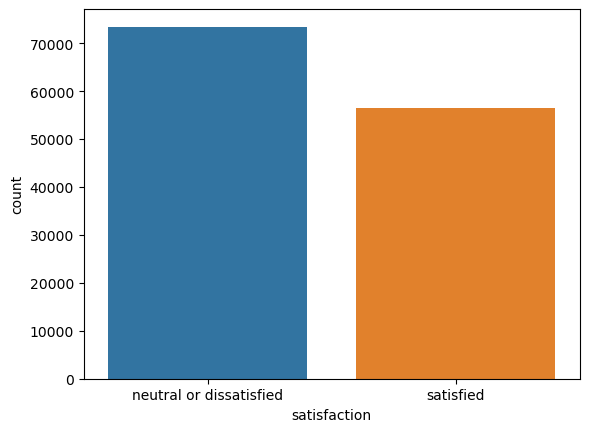

In [16]:
sns.countplot(data=passengers,x='satisfaction')

In the passengers table we can see lot's of factors contributing to the final conclusion, namely whether a passenger is satisfied or not. However, what factors are more important? Below I present a correlation matrix for the whole passengers table followed by a plot representing this matrix.

In [17]:
passengers_dummies.corr().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.00,0.10,0.02,0.04,0.02,-0.00,0.02,0.21,0.16,0.07,0.06,0.04,-0.05,0.03,-0.05,0.05,-0.01,-0.01,0.01,-0.28,-0.04,-0.13,-0.01,0.13
Flight Distance,0.10,1.00,0.01,-0.02,0.06,0.01,0.06,0.22,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.10,0.00,-0.00,0.00,-0.23,-0.27,-0.40,-0.12,0.30
Inflight wifi service,0.02,0.01,1.00,0.34,0.71,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,-0.02,-0.02,0.01,-0.01,-0.11,-0.04,0.01,0.28
Departure/Arrival time convenient,0.04,-0.02,0.34,1.00,0.44,0.45,0.00,0.07,0.01,-0.01,0.07,0.01,0.07,0.09,0.07,0.01,0.00,-0.00,0.01,-0.21,0.26,0.08,0.03,-0.05
Ease of Online booking,0.02,0.06,0.71,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,-0.01,-0.01,0.01,-0.02,-0.13,-0.10,-0.02,0.17
Gate location,-0.00,0.01,0.34,0.45,0.46,1.00,-0.00,0.00,0.00,0.00,-0.03,-0.01,0.00,-0.04,0.00,-0.01,0.01,0.01,-0.00,0.00,-0.03,-0.01,-0.00,-0.00
Food and drink,0.02,0.06,0.13,0.00,0.03,-0.00,1.00,0.23,0.58,0.62,0.06,0.03,0.04,0.09,0.04,0.66,-0.03,-0.03,0.00,-0.06,-0.07,-0.08,-0.02,0.21
Online boarding,0.21,0.22,0.46,0.07,0.40,0.00,0.23,1.00,0.42,0.28,0.15,0.12,0.08,0.20,0.07,0.33,-0.02,-0.02,-0.04,-0.19,-0.22,-0.29,-0.08,0.50
Seat comfort,0.16,0.16,0.12,0.01,0.03,0.00,0.58,0.42,1.00,0.61,0.13,0.10,0.07,0.19,0.07,0.68,-0.03,-0.03,-0.03,-0.16,-0.13,-0.20,-0.06,0.35
Inflight entertainment,0.07,0.13,0.21,-0.01,0.05,0.00,0.62,0.28,0.61,1.00,0.42,0.30,0.38,0.12,0.41,0.69,-0.03,-0.03,0.00,-0.11,-0.15,-0.18,-0.05,0.40


<Axes: >

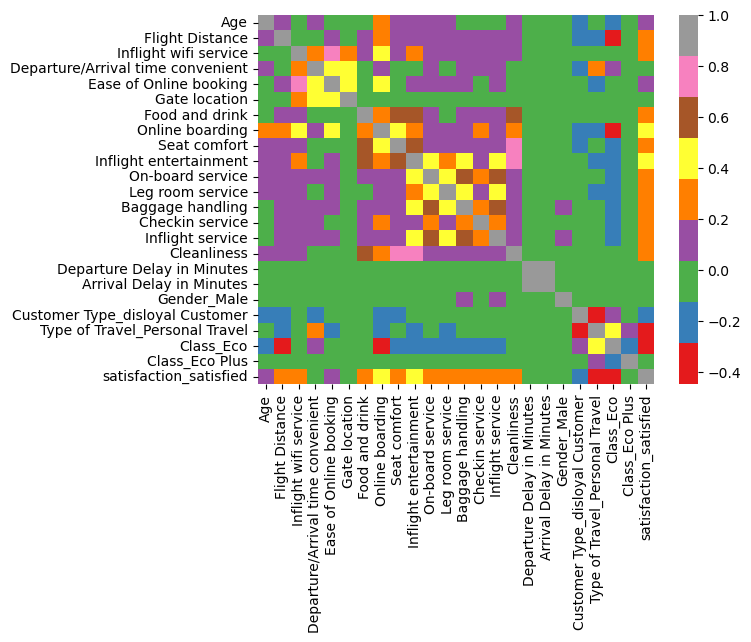

In [18]:
sns.heatmap(passengers_dummies.corr(),cmap='Set1')

Based on the heatmap, I can make several conclusions:
 - There is positive correlation between satisfaction and various flight services, such as wifi, foods and drinks, online boarding, seat comfort, inflight entertainment, baggage handling, cleanliness, leg room, checkin, on-board and inflight services. So all of these services are important for passengers. However, correlation coefficients are not very high, they are in the range of 0.25-0.5. It means that any single factor (i.e. when considered in isolation from other factors) can't change passenger's satisfaction.
 - There is almost zero correlation between satisfaction and departure/arrival time convenience, gate location, departure delay, arrival delay (honestly, it was a surprise for me), age, gender and ease of online booking. It means that these factors have almost no effect on passenger's satisfaction.
 - There is negative correlation between satisfaction and personal type of travel or Eco class. Let's have a closer look at these dependencies in the following plots.

<Axes: xlabel='Class', ylabel='count'>

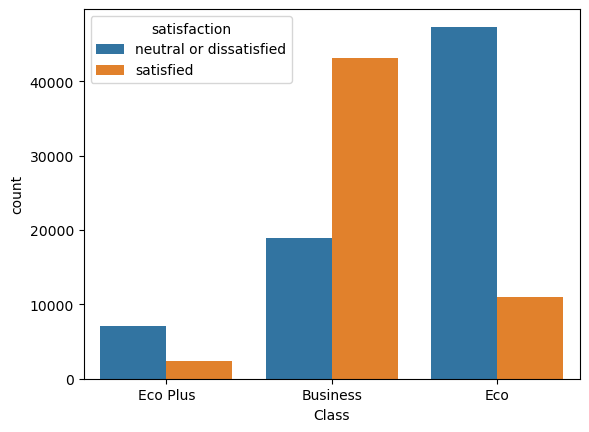

In [19]:
sns.countplot(data=passengers,x='Class',hue='satisfaction')

As expected, the major part of passengers in Business class are satisfied. Probably, it can be explained by higher comfort in Business class. Whereas in Eco and Eco Plus classes major part of passengers are neutral or dissatisfied. See respective shares in % below.

In [20]:
(passengers.groupby(['Class','satisfaction']).count()['id']/passengers.groupby(['Class']).count()['id']*100).round(1)

Class     satisfaction           
Business  neutral or dissatisfied    30.6
          satisfied                  69.4
Eco       neutral or dissatisfied    81.2
          satisfied                  18.8
Eco Plus  neutral or dissatisfied    75.4
          satisfied                  24.6
Name: id, dtype: float64

<Axes: xlabel='Type of Travel', ylabel='count'>

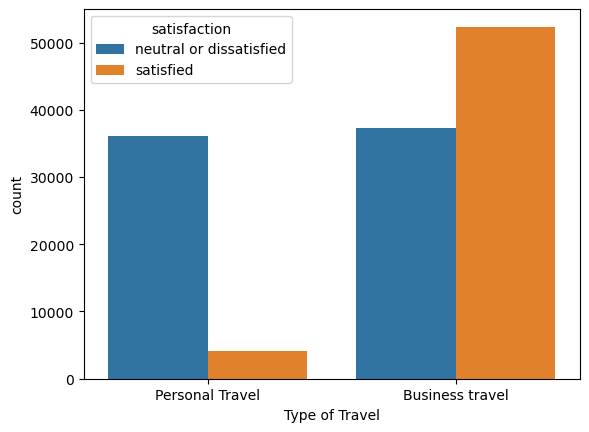

In [21]:
sns.countplot(data=passengers,x='Type of Travel',hue='satisfaction')

The plot above demonstrates that the dominant part of passengers taking a personal travel are neutral or dissatisfied. Whereas the share of satisfied passengers among those taking a business travel exceeds the share of neutral or dissatisfied. In my opinion, it can be explained that people taking a business travel don't have so high expectations regarding the quality of flight services as compared with people taking a personal travel. Why? I can assume that business travels are usually not paid by a passenger himself/herself, but by a company he/she is working for. So such passengers are less demanding in general.

Also, see shares in % below.

In [22]:
(passengers.groupby(['Type of Travel','satisfaction']).count()['id']/passengers.groupby(['Type of Travel']).count()['id']*100).round(1)

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    41.6
                 satisfied                  58.4
Personal Travel  neutral or dissatisfied    89.9
                 satisfied                  10.1
Name: id, dtype: float64

## Split into Training and Test Sets

Now it's time to split our data into a training set and a test set. Remember that test set begins from the row #103594 (i.e. 103904 minus 310 deleted rows with empty cells).

In [23]:
split=passengers_train.shape[0]-passengers_train.isna().any(axis=1).sum()
X_train = passengers_dummies.iloc[:split].drop('satisfaction_satisfied',axis=1)
X_test = passengers_dummies.iloc[split:].drop('satisfaction_satisfied',axis=1)
y_train = passengers_dummies.iloc[:split]['satisfaction_satisfied']
y_test = passengers_dummies.iloc[split:]['satisfaction_satisfied']

In [24]:
split

103594

## Training Decision Tree Model

I chose a decision tree model and random forest model because my goal is to predict value of a target variable by learning simple decision rules inferred from the data features. Let's start by training a single decision tree first.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
decision_tree = DecisionTreeClassifier()

In [27]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree Model

Then I make predictions for the test set and create a classification report and a confusion matrix to evaluate the decision tree model.

In [28]:
decision_tree_predictions = decision_tree.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(classification_report(y_test,decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14528
           1       0.94      0.94      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.95      0.95      0.95     25893



In [31]:
print(confusion_matrix(y_test,decision_tree_predictions))

[[13787   741]
 [  677 10688]]


## Training Random Forest Model

Now it's time to try random forest model.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
random_forest = RandomForestClassifier()

In [34]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation of Random Forest Model

Similarly, I make predictions for the test set and create a classification report and a confusion matrix to evaluate the random forest model.

In [35]:
random_forest_predictions = random_forest.predict(X_test)

In [36]:
print(classification_report(y_test,random_forest_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [37]:
print(confusion_matrix(y_test,random_forest_predictions))

[[14214   314]
 [  669 10696]]


## Conclusion

Both models performed very good. The accuracy reached 95% (decision tree) and 96% (random forest). That means that the models were chosen correctly.

Thank you for attention!